In [272]:
import uproot

import pandas as pd
import ultraplot as plot

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

plot.rc['figure.facecolor'] = 'none'
plot.rc['legend.frameon'] = False

file = uproot.open('reco1muNp_alldata.root')
cheated = file['cheated/cheated'].arrays(library='ak')
cheated_POT = file['cheated/POT'].values()

non_cheated = file['non_cheated/non_cheated'].arrays(library='ak')
non_cheated_POT = file['cheated/POT'].values()

fig, ax = plot.subplots(
    nrows=2, ncols=3,
    # journal='nat2', 
    width=10, height=6, 
    xlabel='Reco', ylabel='Selected spills / bin', 
    rtitle=r'ICARUS MC BNB / $\nu$-only',
    urtitle=r'True $1\mu \text{N}p$, N$>1$ selection', 
    titlecolor='gray', 
    share=False, abc=True, sharey='labs'
)

ax[0].hist(cheated.reco_E.to_numpy(), bins=np.linspace(0, 5, 35), fill=False, label='Cheated', color='r', lw=2)
ax[0].hist(non_cheated.reco_E.to_numpy(), bins=np.linspace(0, 5, 35), fill=True, alpha=0.25, label='Non cheated', color='gray')

ax[1].hist(cheated.true_E.to_numpy(), bins=np.linspace(0, 5, 35), fill=False, color='r', lw=2)
ax[1].hist(non_cheated.true_E.to_numpy(), bins=np.linspace(0, 5, 35), fill=True, alpha=0.25, color='gray')

ax[2].hist(cheated.reco_pT.to_numpy(), bins=np.linspace(0, 5, 35), fill=False, label='Cheated', color='r', lw=2)
ax[2].hist(non_cheated.reco_pT.to_numpy(), bins=np.linspace(0, 5, 35), fill=True, alpha=0.25, label='Non cheated', color='gray')

ax[3].hist(cheated.vertex_difference.to_numpy(), bins=np.linspace(0, 2, 50), fill=False, color='r', lw=2)
ax[3].hist(non_cheated.vertex_difference.to_numpy(), bins=np.linspace(0, 2, 50), fill=True, alpha=0.25, color='gray')

ax[4].hist(cheated.muon_hit_completeness.to_numpy(), bins=np.linspace(0, 1, 35), fill=False, color='r', lw=2)
ax[4].hist(non_cheated.muon_hit_completeness.to_numpy(), bins=np.linspace(0, 1, 35), fill=True, alpha=0.25, color='gray')

ax[5].hist(cheated.muon_hit_purity.to_numpy(), bins=np.linspace(0, 1, 35), fill=False, color='r', lw=2)
ax[5].hist(non_cheated.muon_hit_purity.to_numpy(), bins=np.linspace(0, 1, 35), fill=True, alpha=0.25, color='gray')

# ax[0].legend(loc='upper right', ncol=1)
fig.legend(loc='top')

ax[0].format(xlabel=r'$E^\text{reco}_\nu$')
ax[1].format(xlabel=r'$E^\text{true}_\nu$')
ax[2].format(xlabel=r'${p_T}^\text{reco}_\nu$')
ax[3].format(xlabel=r'$\delta_\text{vertex} = \sqrt{v_\text{true}^2 - v_\text{reco}^2}$', yscale='log')
ax[4].format(xlabel='Hit completeness')
ax[5].format(xlabel='Hit purity')

ax.format(grid=False)


KeyInFileError: not found: 'non_cheated' (with any cycle number)

    Available keys: 'cheated;1', 'non_cheated_checks;1', 'cheated/POT;1', 'cheated_checks;1', 'non_cheated_checks/POT;1', 'cheated/cheated;1', 'cheated/Livetime;1', 'cheated_checks/POT;1', 'non_cheated_checks/Livetime;1', 'cheated_checks/Livetime;1'...

in file reco1muNp_alldata.root

In [273]:
(cheated.reco_E != -1).to_numpy().sum(), (non_cheated.reco_E != -1).to_numpy().sum()

(np.int64(15513), np.int64(15525))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        3., 3., 3., 4., 2., 8., 0., 8., 5., 0., 3., 4., 4., 9., 6., 4., 6.,
        3., 3., 6., 6., 5., 5., 3., 4., 2., 3., 3., 8., 3., 3., 4., 0., 0.,
        5., 1., 2.]),
 array([-1.        , -0.96296296, -0.92592593, -0.88888889, -0.85185185,
        -0.81481481, -0.77777778, -0.74074074, -0.7037037 , -0.66666667,
        -0.62962963, -0.59259259, -0.55555556, -0.51851852, -0.48148148,
        -0.44444444, -0.40740741, -0.37037037, -0.33333333, -0.2962963 ,
        -0.25925926, -0.22222222, -0.18518519, -0.14814815, -0.11111111,
        -0.07407407, -0.03703704,  0.        ,  0.03703704,  0.07407407,
         0.11111111,  0.14814815,  0.18518519,  0.22222222,  0.25925926,
         0.2962963 ,  0.33333333,  0.37037037,  0.40740741,  0.44444444,
         0.48148148,  0.51851852,  0.55555556,  0.59259259,  0.62962963,
         0.66666667,  0.7037037 ,  0.74074074,  0.77777778,  0.81481481,
         0.85185185,

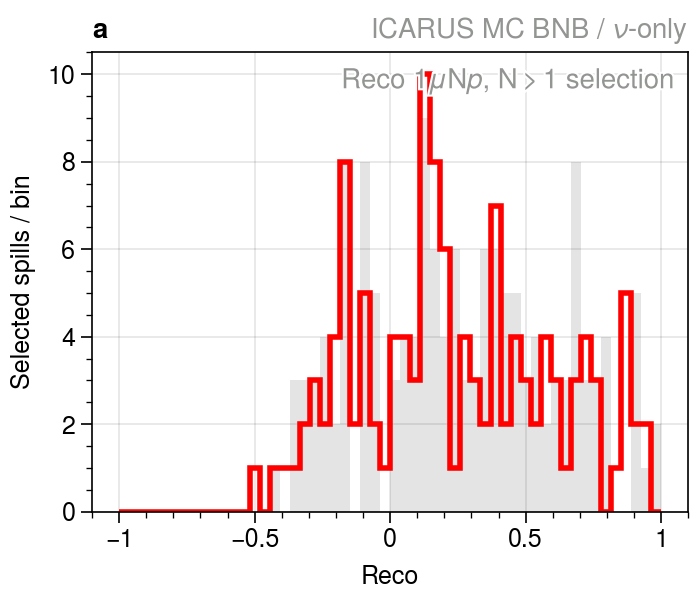

In [387]:
fig, ax = plot.subplots(
    journal='nat1', height=3, 
    xlabel='Reco', ylabel='Selected spills / bin', 
    rtitle=r'ICARUS MC BNB / $\nu$-only',
    urtitle=r'Reco $1\mu \text{N}p$, N$>1$ selection', 
    titlecolor='gray', 
    share=False, abc=True, sharey='labs'
)

binning = np.linspace(-1, 1, 55)

ax.hist(cheated.delta_E.to_numpy(), bins=binning, fill=False, label='Cheated', color='r', lw=2)
ax.hist(non_cheated.delta_E.to_numpy(), bins=binning, fill=True, alpha=0.25, label='Non cheated', color='gray')

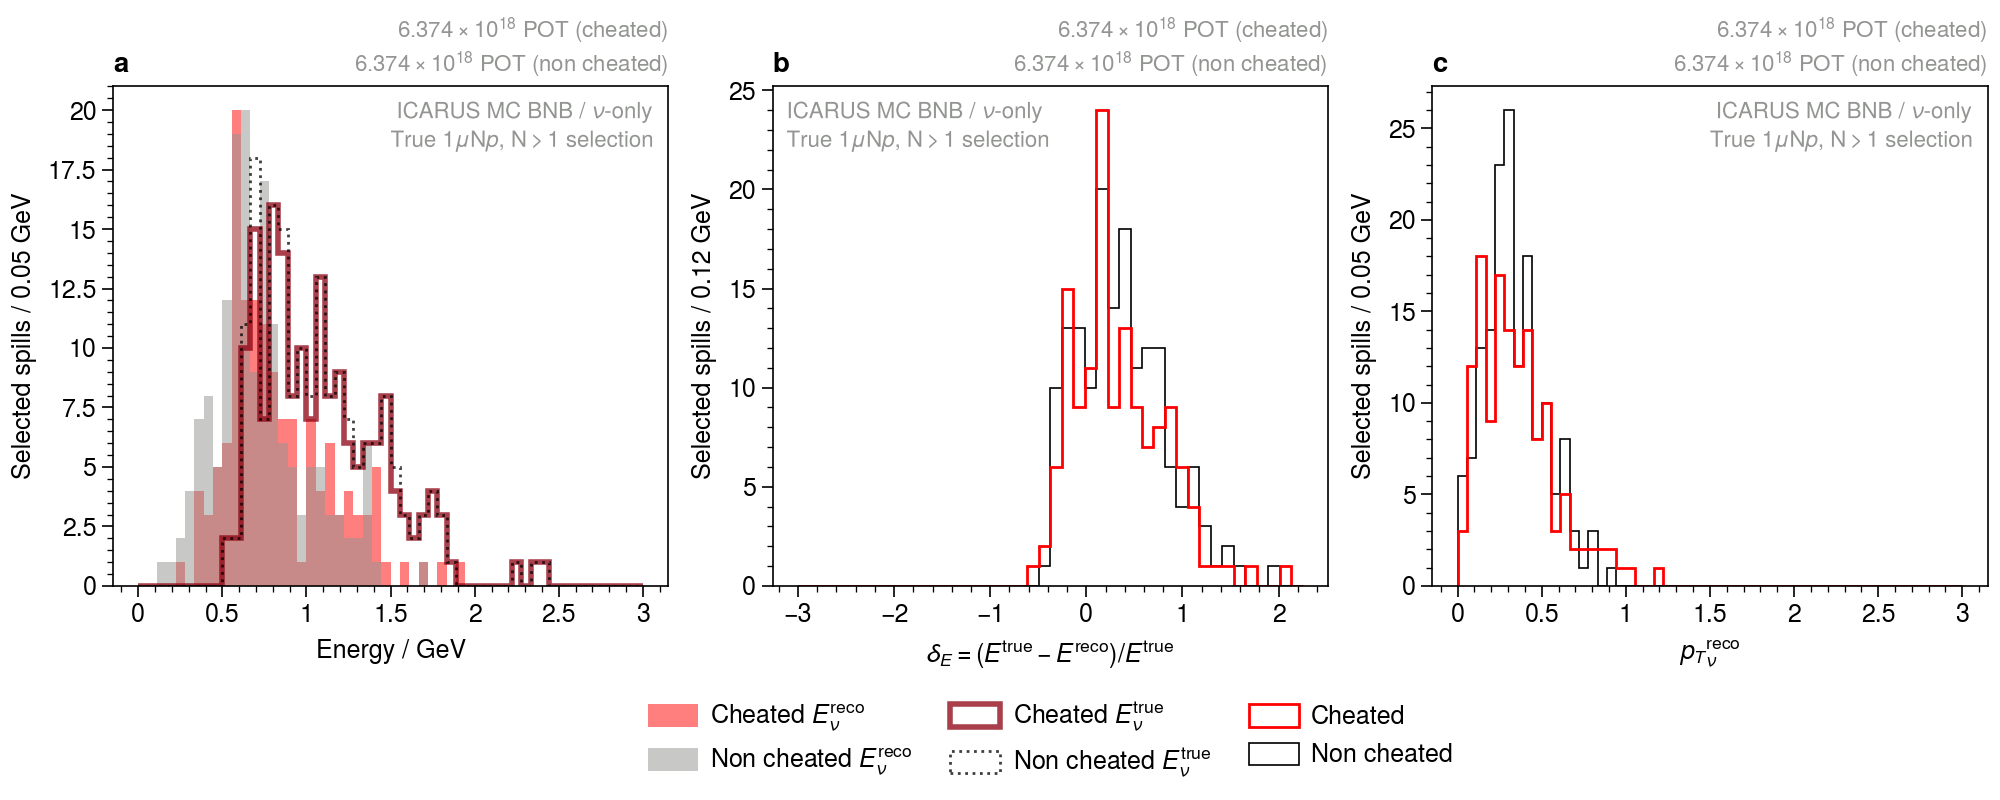

In [388]:
bins = np.linspace(0, 3, 55)

file = uproot.open('reco1muNp_checks.root')
cheated = file['cheated/cheated'].arrays(library='ak')
cheated_checks = file['cheated_checks/cheated_checks'].arrays(library='ak')
cheated_POT = file['cheated/POT'].values()

non_cheated = file['non_cheated/non_cheated'].arrays(library='ak')
non_cheated_checks = file['non_cheated_checks/non_cheated_checks'].arrays(library='ak')
non_cheated_POT = file['cheated/POT'].values()

fig, ax = plot.subplots(
    width=10, height=4, ncols=3, 
    xlabel='Energy / GeV', ylabel=f'Selected spills / {(bins.max()-bins.min())/len(bins):.2f} GeV',  
    rtitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated)\n${non_cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    titlecolor='gray', abc=True, share=False, grid=False, # sharey='labs'
    titlesize=8
)

ax[0].hist(cheated.reco_E.to_numpy(), bins=bins, label='Cheated $E_\\nu^\\text{reco}$', color='red', alpha=0.5)
ax[0].hist(non_cheated.reco_E.to_numpy(), bins=bins, label='Non cheated $E_\\nu^\\text{reco}$', color='gray', alpha=0.5)

ax[0].hist(cheated.true_E.to_numpy(), bins=bins, label='Cheated $E_\\nu^\\text{true}$', color='crimson', fill=False, lw=2, alpha=0.75)
ax[0].hist(non_cheated.true_E.to_numpy(), bins=bins, label='Non cheated $E_\\nu^\\text{true}$', color='k', fill=False, alpha=0.75, lw=1, ls=':')

binning = np.linspace(-3, 2.25, 45)

ax[1].hist(non_cheated.delta_E.to_numpy(), bins=binning, fill=False, color='k')
ax[1].hist(cheated.delta_E.to_numpy(), bins=binning, fill=False, label='Cheated', color='red', lw=1)

ax[2].hist(non_cheated.reco_pT.to_numpy(), bins=bins, fill=False, label='Non cheated', color='k')
ax[2].hist(cheated.reco_pT.to_numpy(), bins=bins, fill=False, color='red', lw=1)

ax[0].format(
    urtitle='ICARUS MC BNB / $\\nu$-only\nTrue $1\\mu \\text{N}p$, N$>1$ selection',
)


ax[1].format(
    ultitle='ICARUS MC BNB / $\\nu$-only\nTrue $1\\mu \\text{N}p$, N$>1$ selection',
    xlabel='$\\delta_E = (E^\\text{true} - E^\\text{reco})/E^\\text{true}$',
    ylabel=f'Selected spills / {(binning.max()-binning.min())/len(binning):.2f} GeV'
)

ax[2].format(
    urtitle='ICARUS MC BNB / $\\nu$-only\nTrue $1\\mu \\text{N}p$, N$>1$ selection',
    xlabel='${p_T}^\\text{reco}_\\nu$',
)

# ax[0].legend(loc='bottom', ncols=2)
# ax[1].legend(loc='bottom', ncols=2)

fig.legend(loc='b', order='F')

fig.savefig('prelim_Enu_6e18POT.pdf')

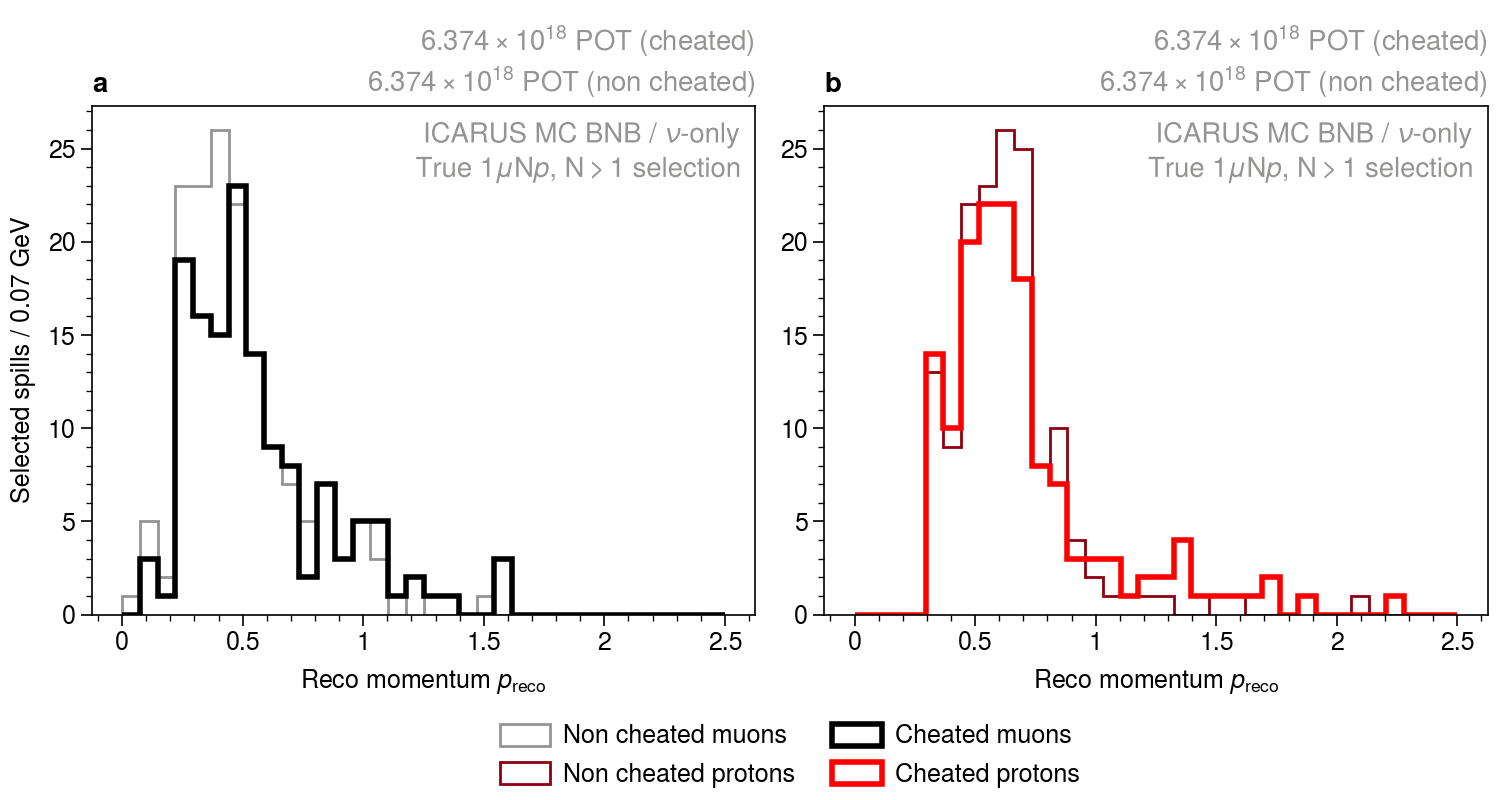

In [389]:
bins = np.linspace(0, 2.5, 35)
fig, ax = plot.subplots(
    width=7.5, height=4, ncols=2, 
    xlabel='Reco momentum $p_\\text{reco}$', ylabel=f'Selected spills / {(bins.max()-bins.min())/len(bins):.2f} GeV',  
    rtitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated)\n${non_cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    titlecolor='gray', abc=True, share=False, grid=False, sharey='labs',
    # titlesize=9,
    urtitle='ICARUS MC BNB / $\\nu$-only\nTrue $1\\mu \\text{N}p$, N$>1$ selection'
)

ax[0].hist(non_cheated_checks.muon_momentum_rangeP.to_numpy(), bins=bins, fill=False, color='gray', lw=1, label='Non cheated muons')
ax[1].hist(non_cheated_checks.proton_momentum_rangeP.to_numpy(), bins=bins, fill=False, color='crimson', lw=1, label='Non cheated protons')

ax[0].hist(cheated_checks.muon_momentum_rangeP.to_numpy(), bins=bins, fill=False, color='k', lw=2, label='Cheated muons')
ax[1].hist(cheated_checks.proton_momentum_rangeP.to_numpy(), bins=bins, fill=False, color='red', lw=2, label='Cheated protons')

fig.legend(loc='b', ncols=2)
fig.savefig('prelim_rangeP_6e18POT.pdf')

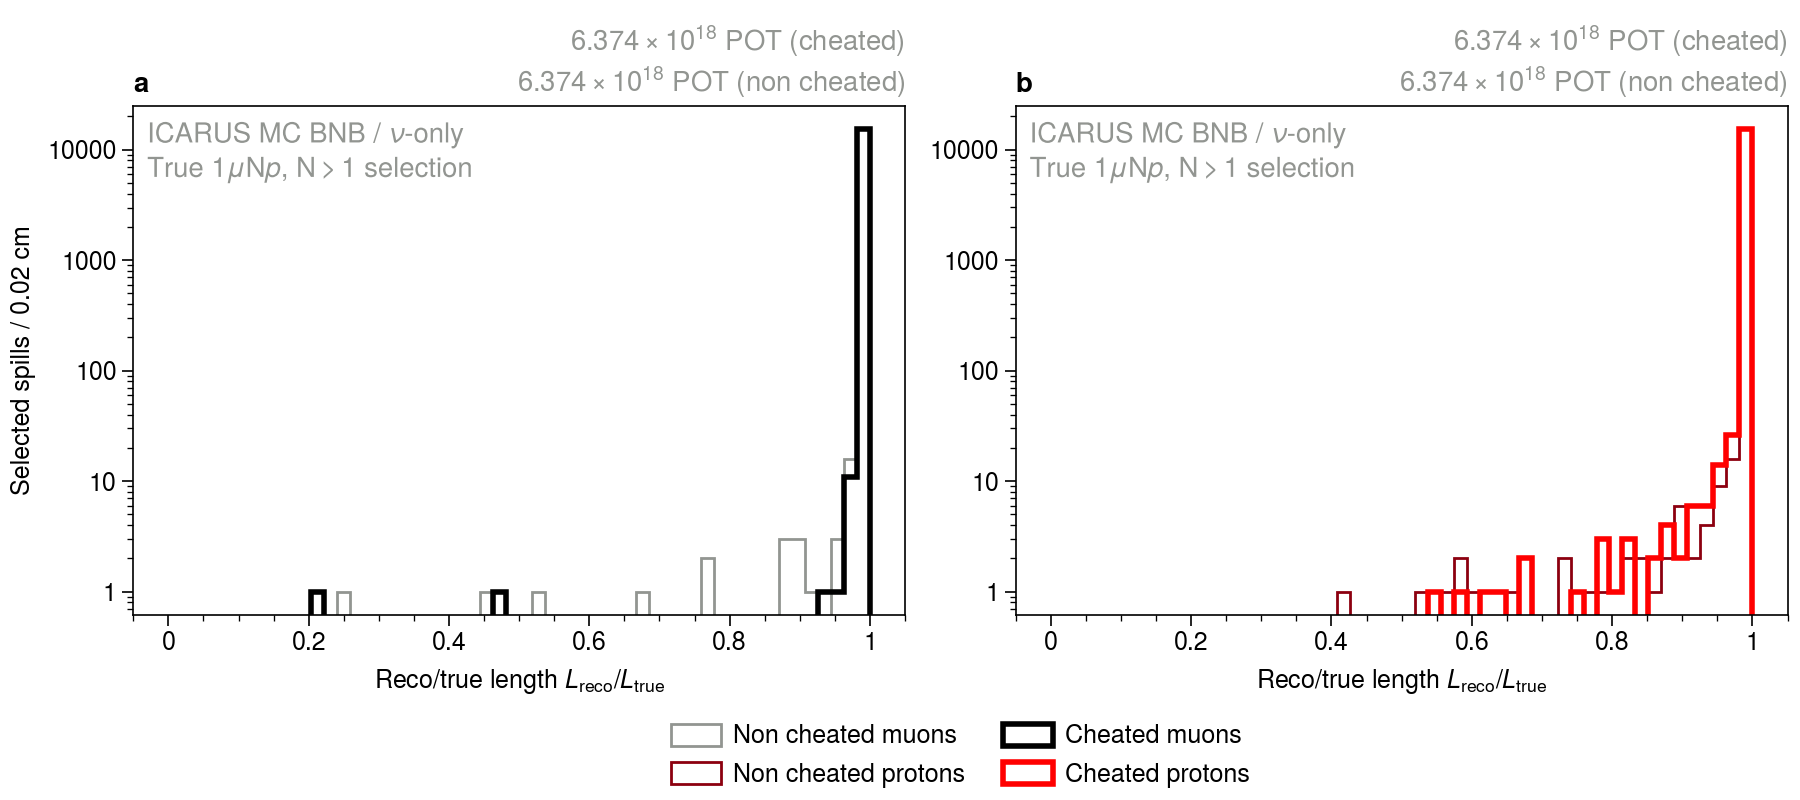

In [410]:
# pid_muon_true_L: float64,
# pid_muon_reco_L: float64,
# pid_proton_true_L: float64,
# pid_proton_reco_L: float64,

bins = np.linspace(0, 0.999999999999999999, 55)
fig, ax = plot.subplots(
    width=9, height=4, ncols=2, 
    xlabel='Reco/true length $L_\\text{reco}/L_\\text{true}$', ylabel=f'Selected spills / {(bins.max()-bins.min())/len(bins):.2f} cm',  
    rtitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated)\n${non_cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    titlecolor='gray', abc=True, share=False, grid=False, sharey='labs',
    # titlesize=9,
    ultitle='ICARUS MC BNB / $\\nu$-only\nTrue $1\\mu \\text{N}p$, N$>1$ selection', yscale='log'
)

ax[0].hist((non_cheated_checks.pid_muon_reco_L/non_cheated_checks.pid_muon_true_L).to_numpy(), bins=bins, fill=False, color='gray', lw=1, label='Non cheated muons')
ax[1].hist((non_cheated_checks.pid_proton_reco_L/non_cheated_checks.pid_proton_true_L).to_numpy(), bins=bins, fill=False, color='crimson', lw=1, label='Non cheated protons')

ax[0].hist((cheated_checks.pid_muon_reco_L/cheated_checks.pid_muon_true_L).to_numpy(), bins=bins, fill=False, color='k', lw=2, label='Cheated muons')
ax[1].hist((cheated_checks.pid_proton_reco_L/cheated_checks.pid_proton_true_L).to_numpy(), bins=bins, fill=False, color='red', lw=2, label='Cheated protons')

fig.legend(loc='b', ncols=2)
fig.savefig('prelim_L_6e18POT.pdf')

In [391]:
cheated_checks.fields




['vertex_difference',
 'vertex_difference_x',
 'vertex_difference_y',
 'vertex_difference_z',
 'muon_purity',
 'muon_completeness',
 'proton_purity',
 'proton_completeness',
 'pid_muon_true_L',
 'pid_muon_reco_L',
 'pid_proton_true_L',
 'pid_proton_reco_L',
 'muon_momentum_rangeP',
 'proton_momentum_rangeP']

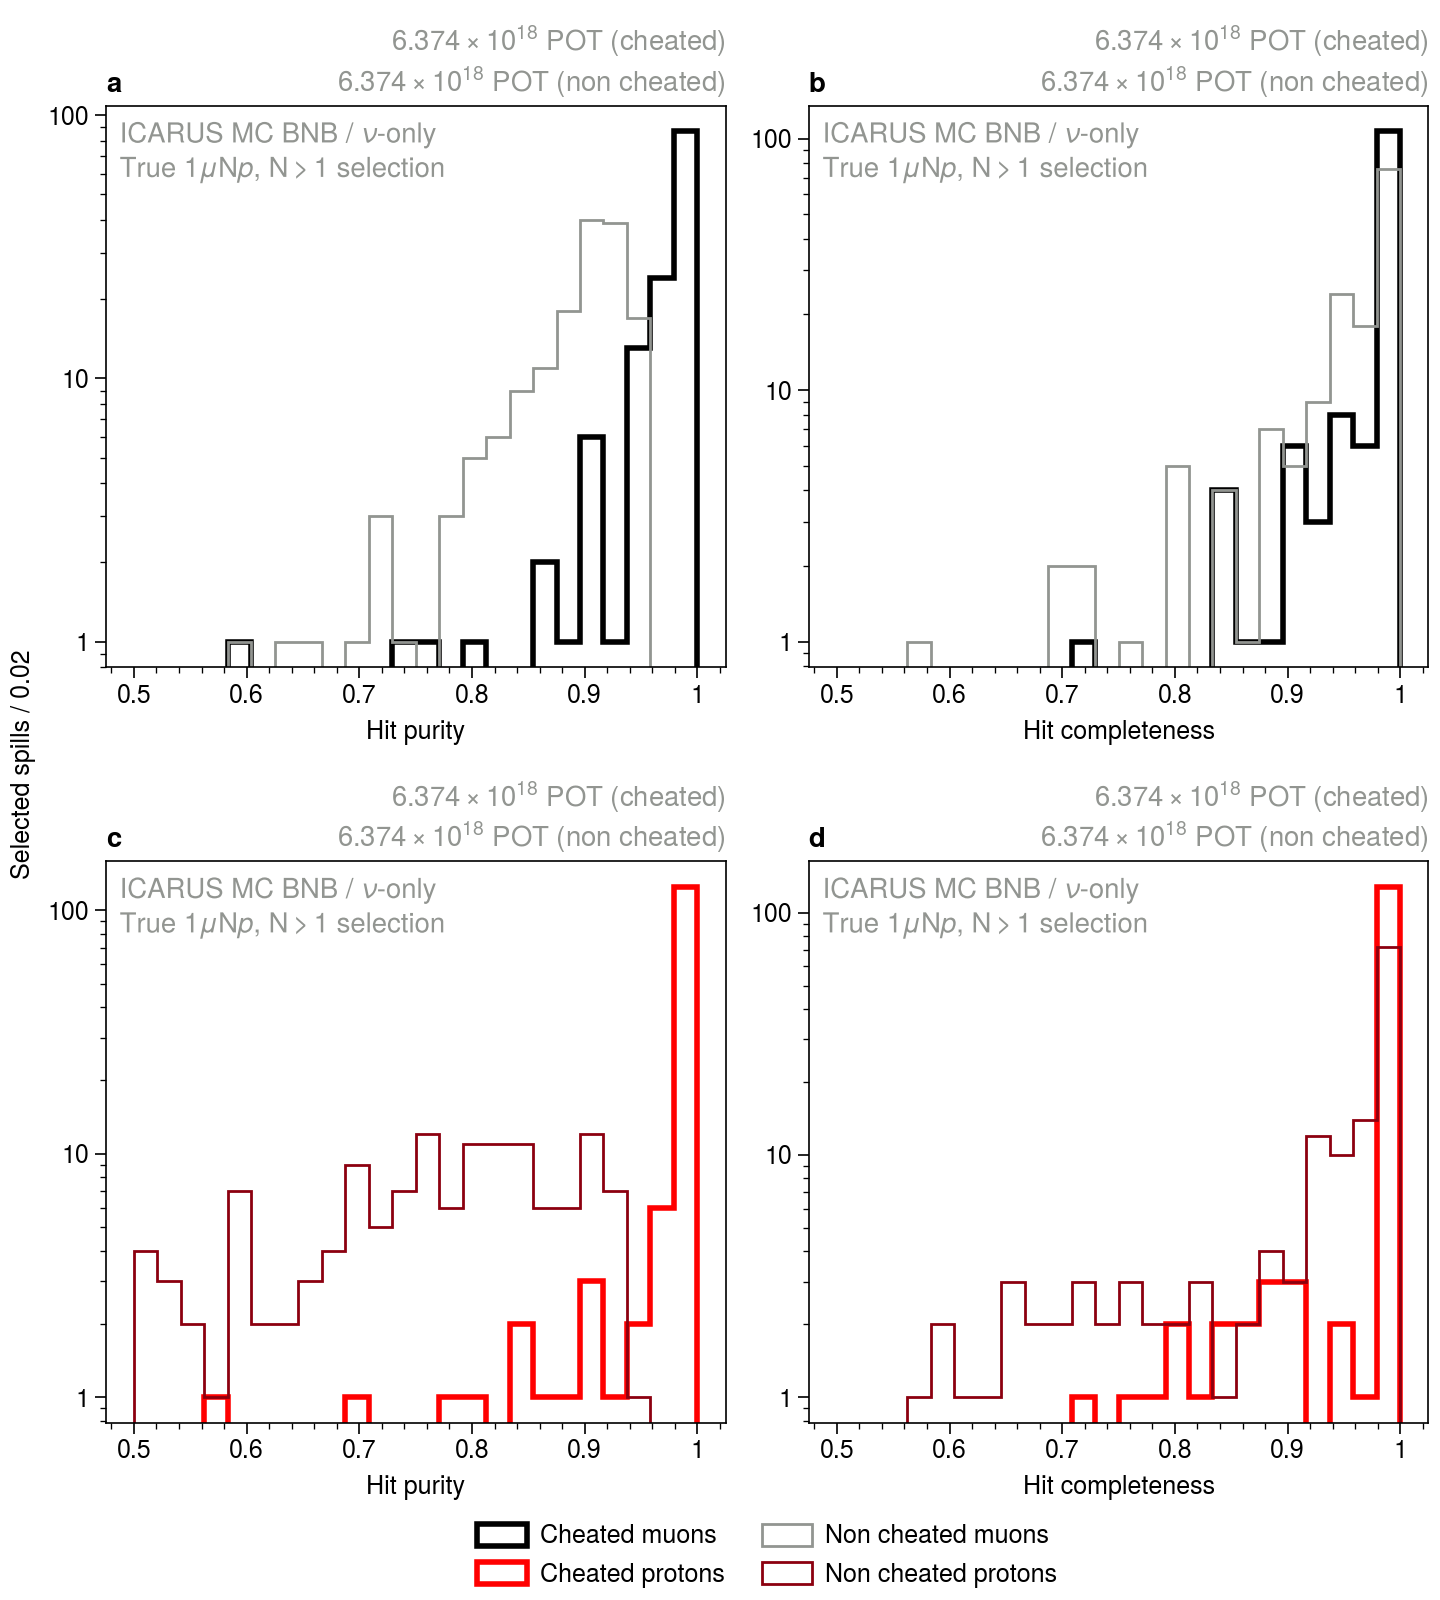

In [414]:
bins = np.linspace(0.5, 1, 25)
fig, ax = plot.subplots(
    journal='nat2', height=8, ncols=2, nrows=2, 
    xlabel='Hit purity', ylabel=f'Selected spills / {(bins.max()-bins.min())/len(bins):.2f}',  
    rtitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated)\n${non_cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    titlecolor='gray', abc=True, share=False, grid=False, sharey='labs', sharex=False,
    # titlesize=9,
    ultitle='ICARUS MC BNB / $\\nu$-only\nTrue $1\\mu \\text{N}p$, N$>1$ selection', yscale='log'
)

ax[0].hist(cheated_checks.muon_purity.to_numpy(), bins=bins, fill=False, color='k', lw=2, label='Cheated muons')
ax[2].hist(cheated_checks.proton_purity.to_numpy(), bins=bins, fill=False, color='red', lw=2, label='Cheated protons')

ax[0].hist(non_cheated_checks.muon_purity.to_numpy(), bins=bins, fill=False, color='gray', lw=1, label='Non cheated muons')
ax[2].hist(non_cheated_checks.proton_purity.to_numpy(), bins=bins, fill=False, color='crimson', lw=1, label='Non cheated protons')


ax[1].hist(cheated_checks.muon_completeness.to_numpy(), bins=bins, fill=False, color='k', lw=2)
ax[3].hist(cheated_checks.proton_completeness.to_numpy(), bins=bins, fill=False, color='red', lw=2)

ax[1].hist(non_cheated_checks.muon_completeness.to_numpy(), bins=bins, fill=False, color='gray', lw=1)
ax[3].hist(non_cheated_checks.proton_completeness.to_numpy(), bins=bins, fill=False, color='crimson', lw=1)


ax[1].format(xlabel='Hit completeness')
ax[3].format(xlabel='Hit completeness')

fig.legend(loc='b', ncols=2)
fig.savefig('prelim_hits_6e18POT.pdf')